# Tutorial 6: Classification

In [1]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(caret)
source('tests_tutorial_06.R')
source("cleanup_tutorial_06.R")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift


Attaching package: ‘testthat’

The following object is masked from ‘package:dplyr’:

    matches

The following object is masked from ‘package:purrr’:

    is_null



## 1. Fruit Dataset

In the agricultural industry, cleaning, sorting, grading, and packaging food products are all necessary tasks in the post-harvest process. Products are classified based on appearance, size and shape, attributes which helps determine the quality of the food. Sorting can be done by humans, but it is tedious and time consuming. Automatic sorting could help save time and money. Images of the food products are captured and analysed to determine visual characteristics. 

The [dataset](https://www.kaggle.com/mjamilmoughal/k-nearest-neighbor-classifier-to-predict-fruits/notebook) contains observations of fruit described with four features 1) mass 2) width 3) height and 4) color score. The dataset `fruit_data_scaled.csv` in the `data` folder has been scaled as part of the data preparation.

**Question 1.0**
<br> {points: 1}

Read the data in `fruit_data_scaled.csv` into the notebook. Name it `fruit_data`.

In [2]:
# your code here
fruit_data<-read_csv('data/fruit_data_scaled.csv')
head(fruit_data)

Parsed with column specification:
cols(
  fruit_label = col_double(),
  fruit_name = col_character(),
  fruit_subtype = col_character(),
  scaled_mass = col_double(),
  scaled_width = col_double(),
  scaled_height = col_double(),
  scaled_color = col_double()
)


fruit_label,fruit_name,fruit_subtype,scaled_mass,scaled_width,scaled_height,scaled_color
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,apple,granny_smith,0.5249358,1.5850841,-0.2889166,-2.76981970
1,apple,granny_smith,0.3068287,1.0954508,-0.6562889,-2.24937587
1,apple,granny_smith,0.2341263,0.3610008,-0.3623910,-2.11926491
2,mandarin,mandarin,-1.4016772,-1.1078991,-2.1992529,0.48295423
2,mandarin,mandarin,-1.4380284,-1.3527158,-2.2727273,0.35284327
2,mandarin,mandarin,-1.5107308,-1.5975324,-2.4931508,0.09262136


In [3]:
test_1.0()

[1] "Success!"


**Question 1.1**
<br> {points: 1}

**Which of the columns are categorical?**

A. Fruit label, width, fruit subtype

B. Fruit name, color score, height

C. Fruit label, fruit subtype, fruit name

D. Color score, mass, width 

*Assign your answer (e.g. `"E"`) to an object called `answer1.1`*

In [4]:
# Make sure the correct answer is an uppercase letter. 
# Surround your answer with quotation marks.
# Replace the fail() with your answer. 

# your code here
answer1.1<-'C'

In [5]:
test_1.1()

[1] "Success!"


**Question 1.2**
<br> {points: 1}

Change the variable `fruit_name` to a factor (using `as.factor`). The variable should still be named `fruit_data`.

In [6]:
# your code here
fruit_data<-fruit_data %>%
    mutate(fruit_name=as.factor(fruit_name))
head(fruit_data)

fruit_label,fruit_name,fruit_subtype,scaled_mass,scaled_width,scaled_height,scaled_color
<dbl>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,apple,granny_smith,0.5249358,1.5850841,-0.2889166,-2.76981970
1,apple,granny_smith,0.3068287,1.0954508,-0.6562889,-2.24937587
1,apple,granny_smith,0.2341263,0.3610008,-0.3623910,-2.11926491
2,mandarin,mandarin,-1.4016772,-1.1078991,-2.1992529,0.48295423
2,mandarin,mandarin,-1.4380284,-1.3527158,-2.2727273,0.35284327
2,mandarin,mandarin,-1.5107308,-1.5975324,-2.4931508,0.09262136


In [7]:
test_1.2()

[1] "Success!"


**Question 1.3**
<br> {points: 1}

Make a scatterplot of scaled mass on the horizontal axis and scaled color score on the vertical axis. Color the points by fruit name. 

*Assign your plot to an object called `fruit_plot`. Make sure to do all the things to make an effective visualization.*

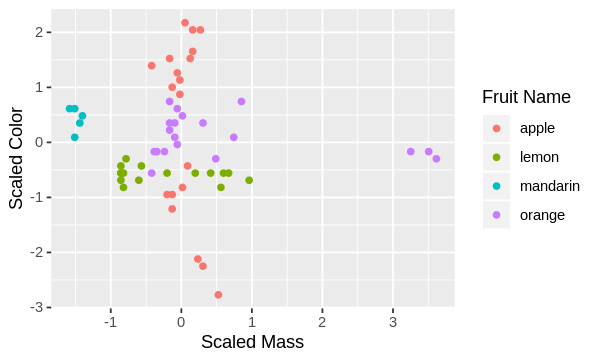

In [8]:
options(repr.plot.width=5,repr.plot.height=3)
# your code here
fruit_plot<-fruit_data %>%
    ggplot(aes(x=scaled_mass,y=scaled_color,color=fruit_name)) +
    geom_point() +
    labs(x="Scaled Mass",y="Scaled Color",color="Fruit Name")
fruit_plot

In [9]:
test_1.3()

[1] "Success!"


**Question 1.4**
<br> {points: 1}

Suppose we have a new observation in the fruit dataset with `scaled_mass = 0.5` and `scaled_colour = 0.5`. 

Label this new data point in black on the scatterplot below. 

*Assign your new plot to an object called `fruit_plot_new`. Again, make sure to label your axes!*

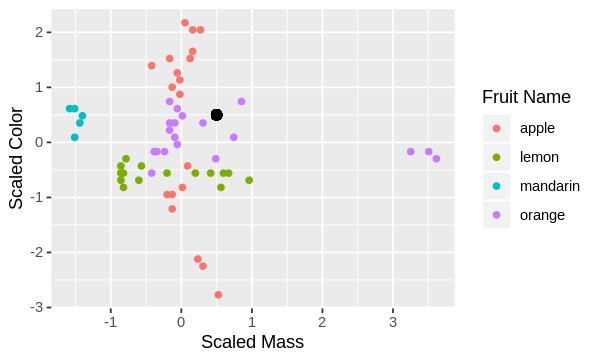

In [10]:
# Add this layer to the fruit_plot object and fill in the missing parts
# geom_point(aes(x = ..., y = ...), color = "black", size = 2.5)

# your code here
fruit_plot_new<-fruit_plot +
    geom_point(aes(x = 0.5, y = 0.5), color = "black", size = 2.5)
fruit_plot_new

In [11]:
test_1.4()

[1] "Success!"


**Question 1.5** 
<br> {points: 3}

Just by looking at the scatterplot, how would you classify this observation using K-nearest neighbours if you use `K = 3`? Explain how you arrived at your answer.

Visually, I would classify the new point inserted above as `orange`, as there are 3 purple points nearby.

**Question 1.6**
<br> {points: 1}

Now, let's use the `caret` package in R to predict `fruit_name` for another new observation. The new observation we are interested in has `scaled_mass = -0.3` and `scaled_color = -0.4`. Use `scaled_mass` and `scaled_color` as the predictors/explanatory variables and choose `K = 5`.

To begin, split the `fruit_data` data frame into the predictors (name it `X_train`) and  the class/outcome (name it `Y_train`).

In [12]:
# your code here
X_train<-fruit_data %>%
    select(scaled_mass,scaled_color) %>%
    data.frame()

Y_train<-fruit_data %>%
    select(fruit_name) %>%
    unlist()
head(X_train)
head(Y_train)

scaled_mass,scaled_color
<dbl>,<dbl>
0.5249358,-2.76981970
0.3068287,-2.24937587
0.2341263,-2.11926491
-1.4016772,0.48295423
-1.4380284,0.35284327
-1.5107308,0.09262136


fruit_name1 fruit_name2 fruit_name3 fruit_name4 fruit_name5 fruit_name6 
      apple       apple       apple    mandarin    mandarin    mandarin 
Levels: apple lemon mandarin orange

In [13]:
test_1.6()

[1] "Success!"


**Question 1.7**
<br> {points: 1}

Specify `K` and create the K-nearest neighbour model object. Name it `fruit_class`.

In [14]:
# your code here
k<-data.frame(k=5)
fruit_class<-train(x=X_train,y=Y_train,method='knn',tuneGrid=k)
print(fruit_class)

Warning message:
“predictions failed for Resample02: k=5 Error in dimnames(x) <- dn : 
  length of 'dimnames' [2] not equal to array extent
”Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”

k-Nearest Neighbors 

59 samples
 2 predictor
 4 classes: 'apple', 'lemon', 'mandarin', 'orange' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 59, 59, 59, 59, 59, 59, ... 
Resampling results:

  Accuracy   Kappa    
  0.8123467  0.7319732

Tuning parameter 'k' was held constant at a value of 5


In [15]:
test_1.7()

[1] "Success!"


**Question 1.8**
<br> {points: 1}

Use the `fruit_class` model and the `predict` function to predict the class for the new fruit observation, where `scaled_mass = -0.3` and `scaled_color = -0.4`. Save your prediction to an object named `fruit_predicted`.

In [16]:
#This is the new observation to predict
new_fruit <- data.frame(scaled_color = -0.4, scaled_mass = -0.3)

# your code here
fruit_predicted<-predict(fruit_class,new_fruit)
print(fruit_predicted)

[1] orange
Levels: apple lemon mandarin orange


In [17]:
test_1.8()

[1] "Success!"


**Question 1.9**
<br> {points: 3}

Revisiting `fruit_plot` and considering the prediction given by K-nearest neighbours above, do you think the classification model did a "good" job predicting? Could you have done/do better? Given what we know this far in the course, what might we want to do to help with tricky prediction cases such as this?

*You can use the code below to visualize the observation whose label we just tried to predict*

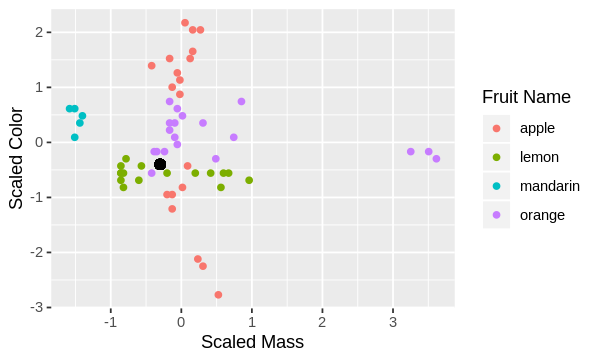

In [18]:
fruit_plot +
    geom_point(aes(x = -0.3, y = -0.4), color = "black", size = 2.5)

Looking at the prediction given in Question 1.8, it seems like the classification model "did an okay job" with predicting. The prediction given was in line with my visual human prediction. However, my prediction was not without uncertainty. The presence of the green data point did influence my decision ever so slightly. This was certainly an easy problem for the human eye to resolve. However, I'm sure there are other, more challenging problems.

Given what we know so far, it may be useful to print out the distances of all the nearest neighbours so that we can see how close the other relationships are with the point in question. 

Another issue is that we are comparing only the distances between two parameters. We should also compare the relationships of the given point with other parameters to better predict the type of fruit. It is very possible that the scaled color and scaled masses of lemons and oranges overlap, and that the model has inaccurately predicted the fruit to be an orange when, in fact, it is a lemon.

**Question 1.10**
<br> {points: 3}

Now do K-nearest neighbours classification again with the same data set, same K, and same new observation. However, this time, let's use *all* the columns in the dataset as predictors (except for the categorical `fruit_label`, `fruit_name`, and `fruit_subtype` variables).

We have provided the `new_fruit_all` `data.frame` below, which encodes the predictors for our new observation. Your job is to use K-nearest neighbours to predict the class of this point.

In [19]:
#This is the new observation to predict
new_fruit_all <- data.frame(scaled_mass = -0.3, 
                            scaled_width = -0.5, 
                            scaled_height = 1.0,
                            scaled_color = -0.4)


# your code here
X_train<-fruit_data %>%
    select(-fruit_label,-fruit_name,-fruit_subtype) %>%
    data.frame()

Y_train<-fruit_data %>%
    select(fruit_name) %>%
    unlist()

fruit_model<- train(x=X_train,y=Y_train,method='knn',tuneGrid=k)
predict(fruit_model,new_fruit_all)

[1] lemon
Levels: apple lemon mandarin orange

**Question 1.11**
<br> {points: 3}

Did your second classification on the same data set with the same K change the prediction? If so, why do you think this happened?

The second classification on the same dataset with the same K did change the prediction. As I previously mentioned, it's likely that the scaled color and scaled masses of lemons and oranges overlap, and that the model has inaccurately predicted the fruit to be an orange when, in fact, it is a lemon. 

The re-classification of the same dataset with all the parameters has changed our prediction.

## 2. Wheat Seed Dataset

X-ray images can be used to analyze and sort seeds. In [this data set](https://archive.ics.uci.edu/ml/datasets/seeds), we have 7 measurements from x-ray images from 3 varieties of wheat seeds (Kama, Rosa and Canadian). 

**Question 2.0**
<br> {points: 3}

Let's use `caret` with this data to perform K-nearest neighbours to classify the wheat variety of a new seed we measure with the given observed measurements (from an x-ray image) shown below. Choose `K = 5` to perform the classification.

The seven measurements were taken below for each wheat kernel:
1. area A, 
2. perimeter P, 
3. compactness C = 4*pi*A/P^2, 
4. length of kernel, 
5. width of kernel, 
6. asymmetry coefficient 
7. length of kernel groove. 

The data set is available here: https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt. The last column in the data set is the variety label. The mapping for the numbers to varieties is listed below:

- 1 == Kama
- 2 == Rosa
- 3 == Canadian

Hints: 
- `colnames()` can be used to specify the column names of a data frame.
- the wheat variety column appears numerical, but you want it to be treated as categorical for this analysis, thus `as.factor()` might be helpful.

In [30]:
#This is the new observation to predict
new_seed <- data.frame(area = 12.1,
                        perimeter = 14.2,
                        compactness = 0.9,
                        length = 4.9,
                        width = 2.8,
                        asymmetry_coefficient = 3.0, 
                        groove_length = 5.1)

# your code here
data<-read_table2('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt',
                  col_names = FALSE) %>%
    mutate(X8 = as.factor(X8))
colnames(data)<-c("area","perimeter","compactness","length","width","asymmetry_coefficient","groove_length","variety")


X_tr <- data %>%
    select(-variety) %>%
    data.frame()
 
Y_tr <- data %>%
    select(variety) %>%
    unlist()

head(data)
data_model<- train(x=X_tr,y=Y_tr,method='knn',tuneGrid=data.frame(k=5))
seed_result<- predict(data_model, new_seed)
seed_result

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double()
)


area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,variety
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


[1] 3
Levels: 1 2 3

**Question 2.1**
<br> {points: 3}

In 2-3 sentences, in your own words describe your findings from the classification task above.

In the classification above, the results are the following:

**variety label:** 3

According to the variety label mapping, a label **3** is **Canadian**. 

Initially, I had run the classification model without converting variety to a factor (it was left as a double). As a result, the classification of variety returned 2.2. I believe this initial classification was in error. 